<a href="https://colab.research.google.com/github/RostislavB74/NN_HW9/blob/main/GoIT_HW_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras as K
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import keras
import itertools
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [6]:
#Завантажуємо Датасет
from keras.datasets import fashion_mnist

Параметри

In [15]:
num_classes = 10 # загальна кількість класів, у нашому випадку це цифри від 0 до 9
num_features = 28*28 # кількість атрибутів вхідного вектора 28 * 28 = 784

learning_rate = 0.001 # швидкість навчання нейронної мережі
training_steps = 3000 # максимальне число епох
batch_size = 256 # перераховувати ваги мережі ми будемо не на всій вибірці, а на її випадковій підмножині з batch_size елементів
display_step = 100 # кожні 100 ітерацій ми будемо показувати поточне значення функції втрат і точності

n_hidden_1 = 128 # кількість нейронів 1-го шару
n_hidden_2 = 256 # кількість нейронів 2-го шару

In [105]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

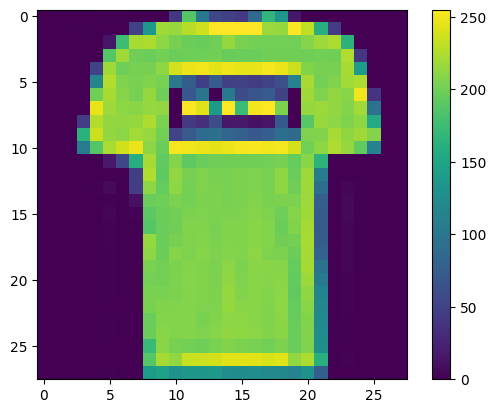

In [9]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()
plt.grid(False)


# ДЗ-9

In [10]:
class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [106]:
# Нормалізуємо значення пікселів
x_train_1, x_test_1 = x_train / 255., x_test / 255.
y_train_1, y_test_1 = y_train, y_test

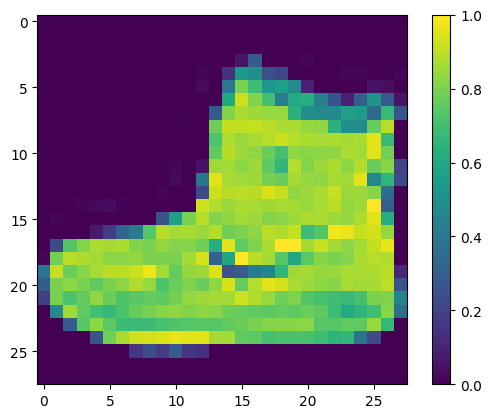

In [58]:
plt.figure()
plt.imshow(x_train_1[0])
plt.colorbar()
plt.grid(False)

Подивимось датасет частково

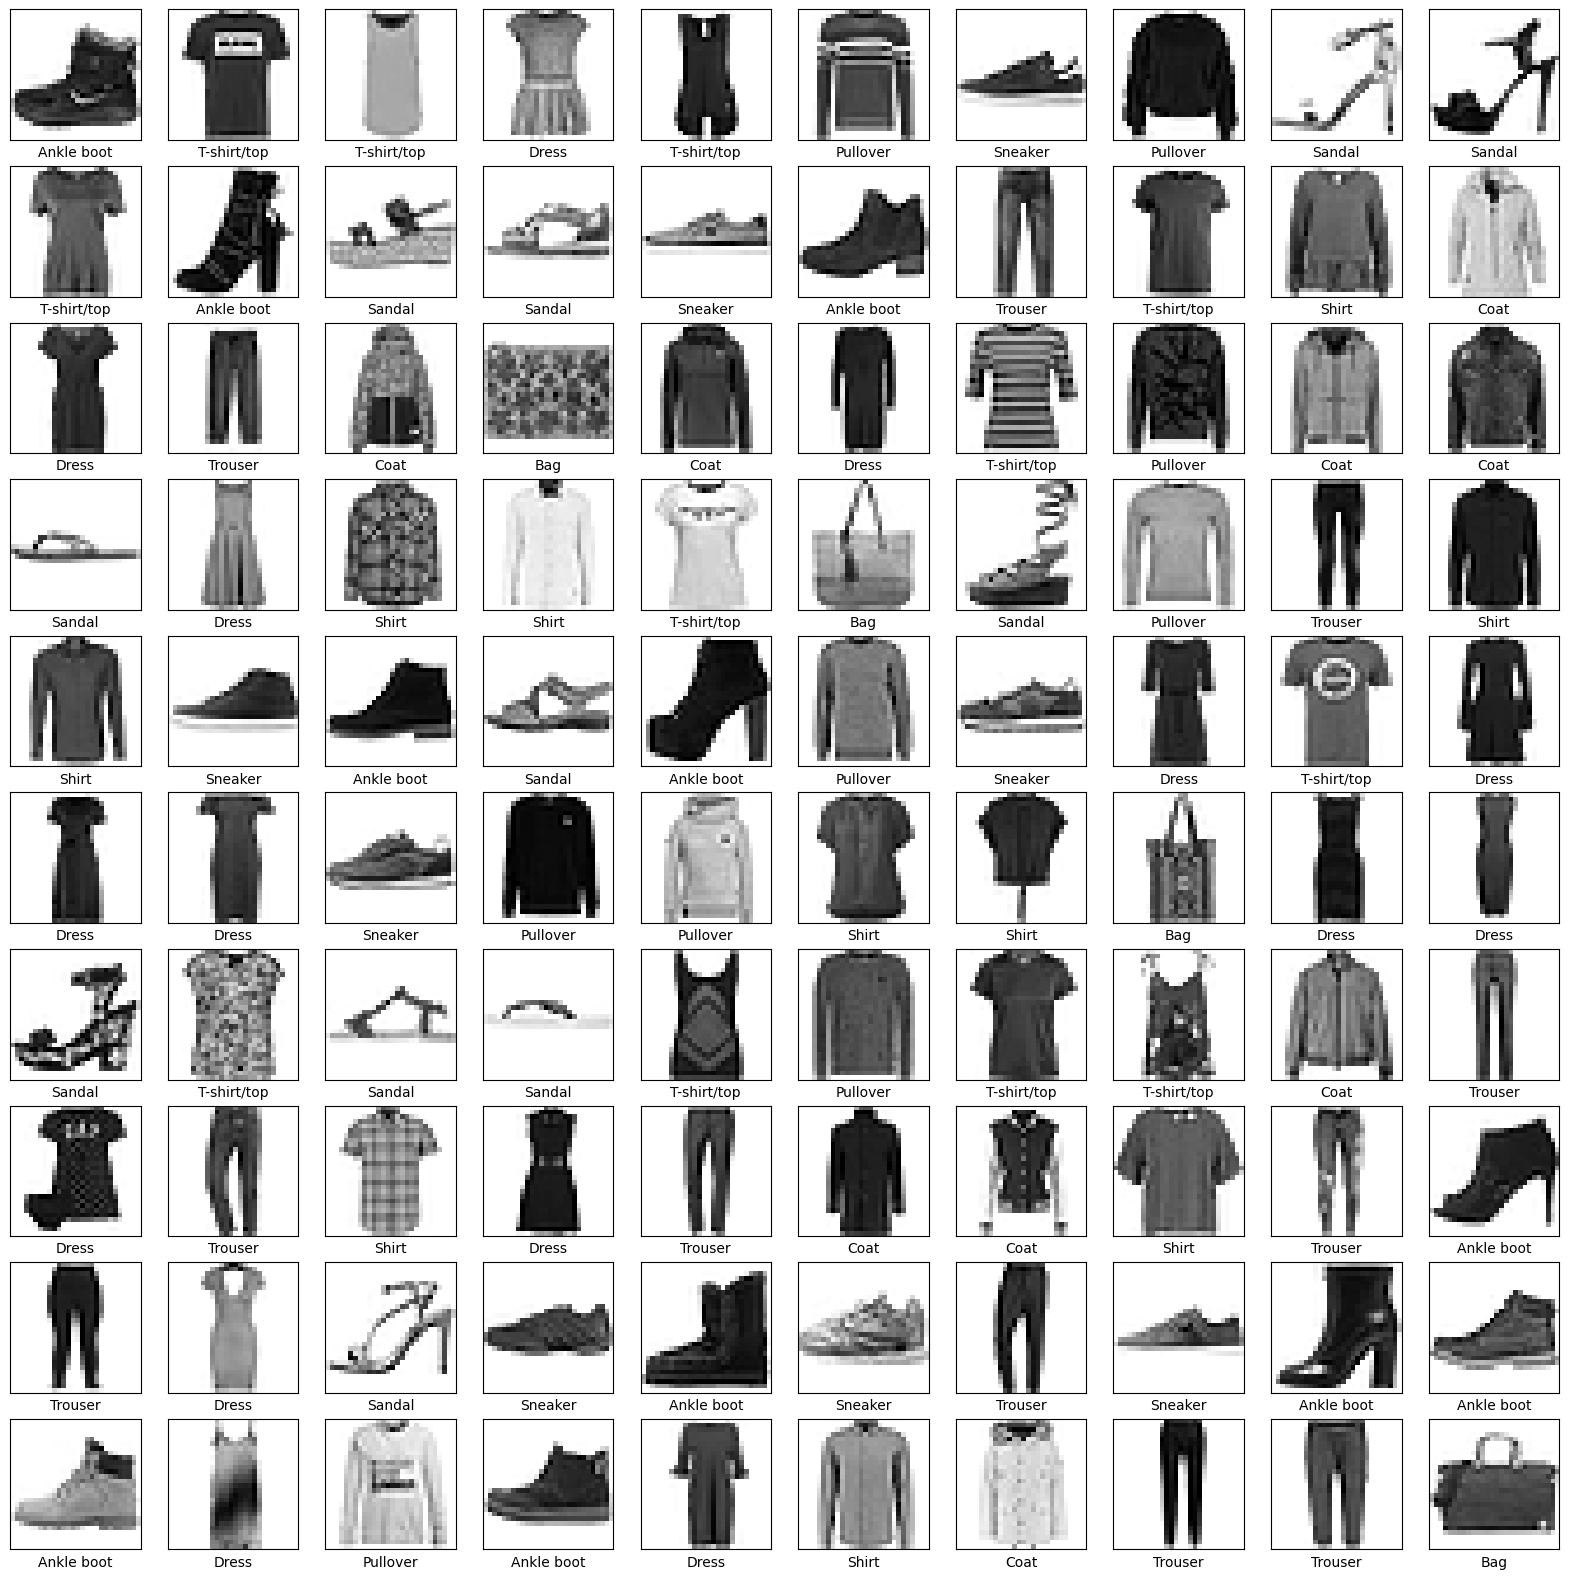

In [13]:
plt.figure(figsize=(20,20))
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train_1[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train_1[i]])


In [107]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28,1)),
    keras.layers.Dense(n_hidden_1, activation='relu', name='1st_layer'),
    Dropout(0.3),
    keras.layers.Dense(n_hidden_2, activation='relu', name='2nd_layer'),
    Dropout(0.3),
    keras.layers.Dense(num_classes, activation = 'softmax', name = 'Hypothesis')
])

In [52]:
#Копиляція моделі

In [108]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [109]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 1st_layer (Dense)           (None, 128)               100480    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 2nd_layer (Dense)           (None, 256)               33024     
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 Hypothesis (Dense)          (None, 10)                2570      
                                                                 
Total params: 136074 (531.54 KB)
Trainable params: 136

Final Loss: 0.29429852962493896
Final Validation Loss: 0.3259483575820923
Final Accuracy: 0.8900208473205566
Final Validation Accuracy: 0.8809166550636292


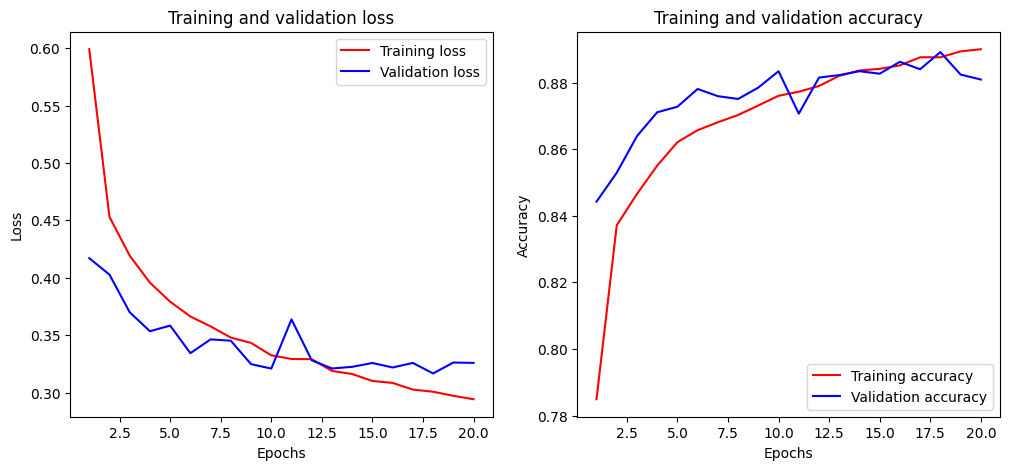

In [110]:
# history=model.fit(x_train_1, y_train_1, batch_size=32, epochs=20, validation_split=0.2)
# history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val), verbose=0)
history = model.fit(x_train_1, y_train_1, batch_size=32, epochs=20, validation_split=0.2, verbose=0)

# Отримання історії навчання
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

final_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]
final_accuracy = history.history['accuracy'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]

print("Final Loss:", final_loss)
print("Final Validation Loss:", final_val_loss)
print("Final Accuracy:", final_accuracy)
print("Final Validation Accuracy:", final_val_accuracy)

# Побудова графіків
plt.figure(figsize=(12, 5))

# Графік втрат
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Графік точності
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [113]:
test_loss_1, test_acc_1 = model.evaluate(x_test_1, y_test_1)
print('Test accuracy:', test_acc_1)
print('Test loss:', test_loss_1)

313/313 [==============================] - 1s 3ms/step - loss: 0.3522 - accuracy: 0.8713
Test accuracy: 0.8712999820709229
Test loss: 0.3521781861782074


1/1 [==============================] - 0s 20ms/step
[[8.5261008e-03 8.1936889e-08 9.2680669e-01 5.1996129e-05 2.8921473e-03
  1.0739578e-09 6.0773522e-02 4.7752130e-10 9.4951701e-04 3.2695582e-09]]
Предмет що розпізнаний: Pullover


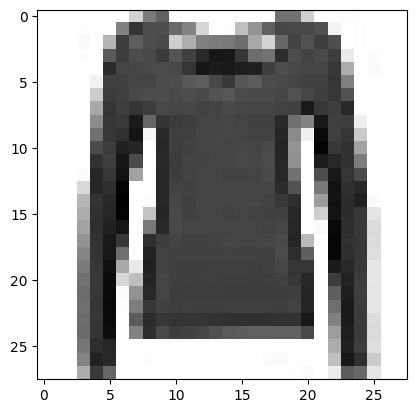

In [115]:
n=233
x=np.expand_dims(x_test_1[n], axis=0)
res = model.predict(x)
print(res)
print(f'Предмет що розпізнаний: {class_names[np.argmax(res)]}')
plt.imshow(x_test_1[n], cmap=plt.cm.binary)
plt.show()

In [116]:
predictions = model.predict(x_train_1)

1875/1875 [==============================] - 3s 2ms/step


In [117]:
predictions[233]

array([2.6920416e-06, 1.2705522e-18, 6.1924416e-10, 4.5788265e-12,
       9.8202886e-09, 9.4697923e-11, 2.5489038e-07, 2.4697869e-11,
       9.9999696e-01, 1.4998018e-12], dtype=float32)

In [118]:
class_names[np.argmax(predictions[233])]

'Bag'

In [119]:
class_names[y_train_1[233]]

'Bag'

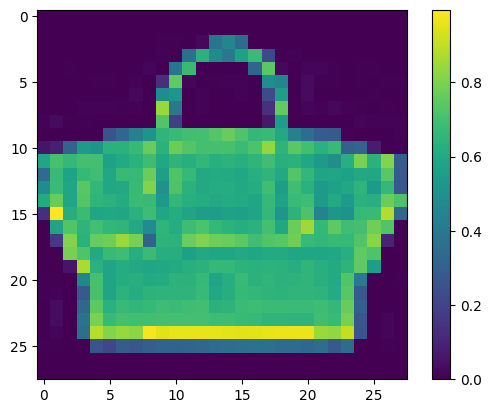

In [120]:
plt.figure()
plt.imshow(x_train_1[233])
plt.colorbar()
plt.grid(False)

In [121]:
class_names[np.argmax(predictions[233])]

'Bag'

In [125]:
from tabulate import tabulate

# Prepare data for the table
table_data = []
for i in range(30):
    predicted_class = predicted_class_names[i]
    true_class = true_class_names[i]
    if predicted_class != true_class:
        table_data.append([f"\033[91m{predicted_class}\033[0m", true_class])
    else:
        table_data.append([predicted_class, true_class])

# Print the table
print(tabulate(table_data, headers=["Predicted Class", "True Class"], tablefmt="fancy_grid"))


╒═══════════════════╤══════════════╕
│ Predicted Class   │ True Class   │
╞═══════════════════╪══════════════╡
│ Ankle boot        │ Ankle boot   │
├───────────────────┼──────────────┤
│ Pullover          │ Pullover     │
├───────────────────┼──────────────┤
│ Trouser           │ Trouser      │
├───────────────────┼──────────────┤
│ Trouser           │ Trouser      │
├───────────────────┼──────────────┤
│ Shirt             │ Shirt        │
├───────────────────┼──────────────┤
│ Trouser           │ Trouser      │
├───────────────────┼──────────────┤
│ Coat              │ Coat         │
├───────────────────┼──────────────┤
│ Shirt             │ Shirt        │
├───────────────────┼──────────────┤
│ Sandal            │ Sandal       │
├───────────────────┼──────────────┤
│ Sneaker           │ Sneaker      │
├───────────────────┼──────────────┤
│ Coat              │ Coat         │
├───────────────────┼──────────────┤
│ Sandal            │ Sandal       │
├───────────────────┼──────────────┤
│

In [126]:
mask=predictions_all==y_test_1
print(mask[:30])
x_false=x_test_1[~mask]
y_false=predictions_all[~mask]
print(x_false.shape)

[ True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True  True False  True False
  True False  True  True  True  True]
(1160, 28, 28)


In [127]:
print(f'Кількість помилкових значень: {len(x_false)}')


Кількість помилкових значень: 1160


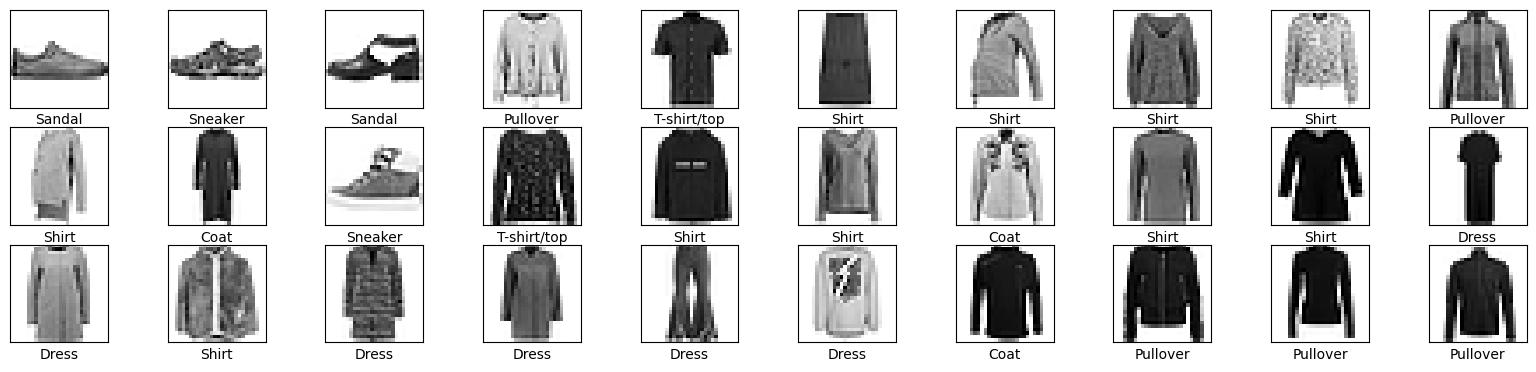

In [130]:
plt.figure(figsize=(20,15))
for i in range(30):
  plt.subplot(10,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_false[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_false[i]])

In [131]:
import numpy as np

# Порівняння прогнозованих міток з правильними мітками
mask = predictions_all != y_test_1

# Отримання помилкових прогнозів та їх правильних міток
x_false = x_test_1[mask]
y_false = y_test_1[mask]

# Підрахунок кількості помилкових класифікацій для кожної цифри
false_counts = np.bincount(y_false)

for digit, count in enumerate(false_counts):
    print(f"{class_names[digit]}: {count} помилкових класифікацій")

T-shirt/top: 166 помилкових класифікацій
Trouser: 19 помилкових класифікацій
Pullover: 231 помилкових класифікацій
Dress: 85 помилкових класифікацій
Coat: 247 помилкових класифікацій
Sandal: 48 помилкових класифікацій
Shirt: 268 помилкових класифікацій
Sneaker: 25 помилкових класифікацій
Bag: 19 помилкових класифікацій
Ankle boot: 52 помилкових класифікацій


In [132]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[885   3  14  24   7   0  59   0   8   0]
 [  3 969   1  21   2   0   2   0   2   0]
 [ 18   3 801   9 105   1  62   0   1   0]
 [ 27  12   9 903  25   0  20   0   4   0]
 [  0   0 118  49 806   0  24   0   3   0]
 [  0   0   0   0   0 955   0  20   2  23]
 [202   0 112  24 109   0 539   0  14   0]
 [  0   0   0   0   0  12   0 908   0  80]
 [  2   0   4   2   5   3   9   3 972   0]
 [  0   0   0   0   0   7   1  17   0 975]]


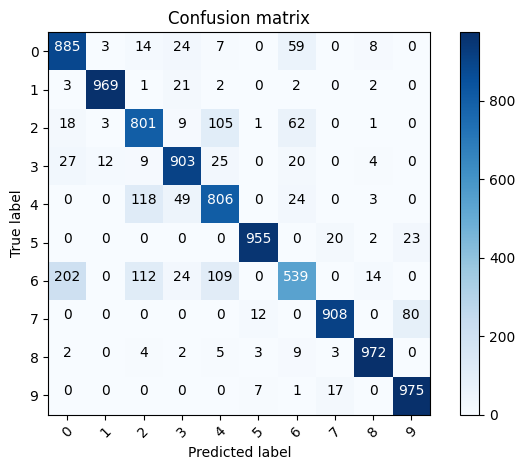

In [133]:
y_pred = np.argmax(model.predict(x_test_1), axis=1)
cm = confusion_matrix(y_test_1, y_pred)
plot_confusion_matrix(cm, classes=range(10))